### Shifted linear interpolation
Example based on the [paper](http://bigwww.epfl.ch/publications/blu0401.pdf): Blu T, Thévenaz P, Unser M (2004): Linear Interpolation Revitalized. IEEE Trans. Image Proc. 13(5), 710-9

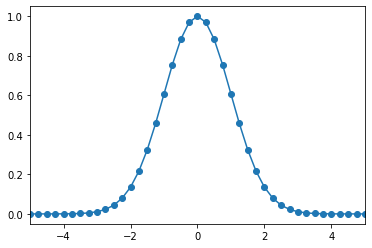

In [2]:
# Shifted linear interpolation
# 
# Interpolation of the Gaussian function
# 
import numpy as np
import matplotlib.pyplot as plt

dx = 0.25;
# vector of samples
xk = np.arange(-5,5+dx/2,dx)
fk = np.exp(-xk**2/2)
plt.plot(xk,fk,'o-');
plt.xlim([-5,5])
plt.show()

Calculation of the coefficient vector `c` and interpolation using the shifted basis points in `xks`.

In [3]:
# prefilter
def prefilter(fk,shift):
    pole=shift/(shift-1)
    zero=1/(1-shift)
    c=np.zeros(len(fk))
    c[0]=fk[0]
    for i in range(1,len(c)):
        c[i]=pole*c[i-1]+zero*fk[i]
    return c

# interpolation for arbitrary x
def slintp(x,xks,c):
    dx=xks[1]-xks[0]
    if x<=xks[0]:
        return c[0]
    else:
        nk = (x-xks[0])/dx
        k = int(nk)
        deltax = dx*(nk-k)
        #print(deltax/dx)
        return (c[k]*(dx-deltax)+c[k+1]*deltax)/dx


Residuals of the shifted linear interpolation

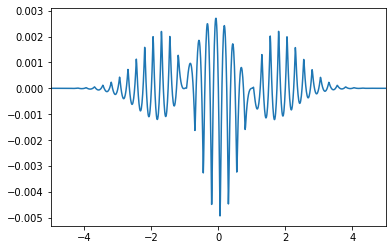

std: 0.000876


In [4]:
# optimum shift
shift = 0.21
# shifted node vector
xks = xk+shift*dx
# shifted linear interpolation
xi = np.arange(-5,5.005,0.01)
nxi = len(xi)
fi = np.zeros(nxi)
c  = prefilter(fk,shift)
#print(len(c)) # 41
for i in range(0,nxi):
    fi[i] = slintp(xi[i],xks,c)
dfis=np.exp(-xi**2/2)-fi

plt.plot(xi,dfis)
plt.xlim([-5,5])
plt.show()

# standard deviation of residuals
L2s = np.std(dfis)  # 0.000876
print("std: {:.6f}".format(L2s))

Traditional linear interpolation

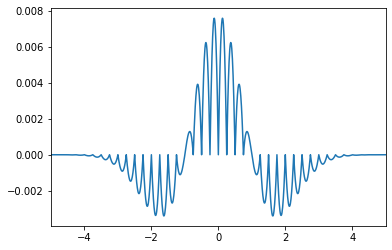

std: 0.002072


In [5]:
# not shifted linear interpolation
shift = 0.0
xks = xk+shift*dx
c  = prefilter(fk,shift)
for i in range(0,nxi):
    fi[i] = slintp(xi[i],xks,c)
dfil=np.exp(-xi**2/2)-fi

plt.plot(xi,dfil)
plt.xlim([-5,5])
plt.show()

L2l = np.std(dfil)  # 0.002072
print("std: {:.6f}".format(L2l))

Gain of the shifted linear interpolation

gain: 7.476 dB


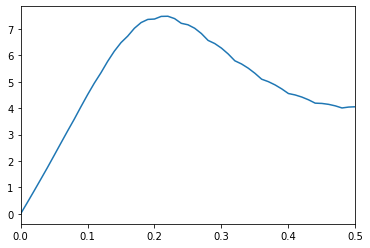

In [6]:
# gain of shifted linear interpolation dB
dBgain = 20*np.log10(L2l/L2s)  # 7.476
print("gain: {:.3f} dB".format(dBgain))


# interpolation gain in terms of shift
def gain(shift):
    dx = 0.25;
    xk = np.arange(-5,5+dx/2,dx)
    fk = np.exp(-xk**2/2)
    xks = xk+shift*dx
    xi = np.arange(-5,5.005,0.01)
    nxi = len(xi)
    fi = np.zeros(nxi)
    c  = prefilter(fk,shift)
    for i in range(0,nxi):
        fi[i] = slintp(xi[i],xks,c)
    dfis=np.exp(-xi**2/2)-fi
    L2s = np.std(dfis)
    L2l = 0.002072
    return 20*np.log10(L2l/L2s)

s = np.arange(0,0.5+0.005,0.01)
gs = np.zeros_like(s)
ns = len(s)
for i in range(ns):
    gs[i] = gain(s[i])

plt.plot(s,gs)
plt.xlim([0,0.5])
plt.show()

Prefilter coefficients

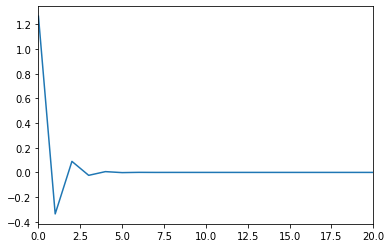

In [7]:
# h(n) prefilter coefficients
tau = 0.21
kvec = np.arange(0,101)
hn = (-1)**kvec/(1-tau)*(tau/(1-tau))**kvec

plt.plot(kvec[:21],hn[:21])
plt.xlim([0,20])
plt.show()

Synthesis function (interpolating)

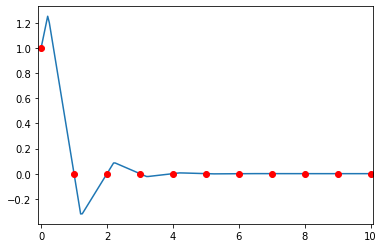

In [8]:
def hat(x):
    if np.abs(x)>1:
        return 0
    else:
        return 1-np.abs(x)

def fint(x,hn,tau):
    f = 0
    n = len(hn)
    for i in range(n):
        f = f + hn[i]*hat(x-i-tau)
    return f

xf = np.arange(0,10+0.02,0.05)
f = np.zeros_like(xf)
for i in range(len(xf)):
    f[i] = fint(xf[i],hn,tau)

# plot of the synthesis function
plt.plot(xf,f)
x0 = np.arange(0,11)
z0 = np.zeros_like(x0); z0[0]=1
plt.plot(x0,z0,'ro')
plt.xlim([-0.08,10.08])
plt.show()
